In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the Universal bank data

bankdata_t = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\Universalbank.csv", header=0)

# Copy the data to back-up file

bankdata_bk = bankdata_t.copy()

# Display first five records

bankdata_t.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Split the data and copy 10% data (stratified split on target variable) to new dataset 

bankdata= bankdata_t.groupby('CreditCard', group_keys=False).apply(lambda x: x.sample(frac=0.20))

# Display the shape

bankdata.shape

(1000, 14)

In [4]:
# Display the CreditCard varibale count

bankdata['CreditCard'].value_counts()

0    706
1    294
Name: CreditCard, dtype: int64

In [5]:
# Display the CreditCard varibale count

bankdata_t['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [6]:
# Check if there are duplicate rows in the dataset

bankdata.duplicated().any()

False

In [7]:
# Re-setting the row index

bankdata = bankdata.reset_index(drop=True)

In [8]:
# Display the dataset information

bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1000 non-null   int64  
 1   Age                 1000 non-null   int64  
 2   Experience          1000 non-null   int64  
 3   Income              1000 non-null   int64  
 4   ZIP Code            1000 non-null   int64  
 5   Family              1000 non-null   int64  
 6   CCAvg               1000 non-null   float64
 7   Education           1000 non-null   int64  
 8   Mortgage            1000 non-null   int64  
 9   Personal Loan       1000 non-null   int64  
 10  Securities Account  1000 non-null   int64  
 11  CD Account          1000 non-null   int64  
 12  Online              1000 non-null   int64  
 13  CreditCard          1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [9]:
# Display all the columns in dataset

bankdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
# Delete the columns which are not influencing the target variable and display forst 5 records

del bankdata['ID']
del bankdata['ZIP Code']

bankdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,38,13,119,2,7.8,1,221,0,0,0,0,0
1,29,3,108,4,1.8,2,0,0,0,0,0,0
2,54,30,23,2,0.4,1,0,0,0,0,0,0
3,43,19,81,2,3.2,1,0,0,0,0,0,0
4,27,0,38,4,1.0,3,154,0,0,0,1,0


In [11]:
# Identify the independent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [12]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [14]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"C:\Users\Narasimha Reddy\OneDrive\Desktop\intern\HTResults.csv", header=0)
HTResults.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,0,0.0,0.0,LogisticRegression(),276,2378,541,24056,0.893,0.338,0.104,0.159,0.978,MCC,0.541000,0.541
1,1,1.0,1.0,DecisionTreeClassifier(),1232,1422,4295,20302,0.790,0.223,0.464,0.301,0.825,MCC,0.644795,0.644
2,2,2.0,2.0,RandomForestClassifier(),548,2106,947,23650,0.888,0.367,0.206,0.264,0.961,MCC,0.583990,0.584
3,3,3.0,3.0,ExtraTreesClassifier(),513,2141,614,23983,0.899,0.455,0.193,0.271,0.975,MCC,0.584165,0.584
4,4,4.0,4.0,KNeighborsClassifier(),695,1959,1148,23449,0.886,0.377,0.262,0.309,0.953,MCC,0.607598,0.607


# Logistic Regession Algorithm

Confusion matrix : 
 [[ 13  74]
 [  3 210]]
Outcome values : 
 13 74 3 210
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.15      0.25        87
           0       0.74      0.99      0.85       213

    accuracy                           0.74       300
   macro avg       0.78      0.57      0.55       300
weighted avg       0.76      0.74      0.67       300

Accuracy : 74.3 %
Precision : 81.2 %
Recall : 14.9 %
F1 Score : 0.252
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 56.8 %
MCC : 0.273
roc_auc_score: 0.568


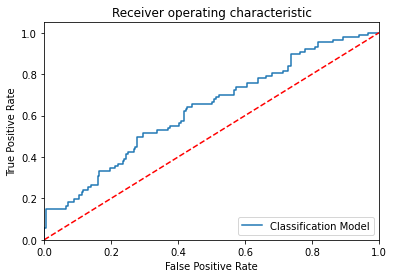

-----------------------------------------------------------------------------------------------------


In [15]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression()

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [16]:
HTResults.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,0.0,0.0,0.0,LogisticRegression(),276.0,2378.0,541.0,24056.0,0.893,0.338,0.104,0.159,0.978,MCC,0.541000,0.541,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,DecisionTreeClassifier(),1232.0,1422.0,4295.0,20302.0,0.790,0.223,0.464,0.301,0.825,MCC,0.644795,0.644,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,RandomForestClassifier(),548.0,2106.0,947.0,23650.0,0.888,0.367,0.206,0.264,0.961,MCC,0.583990,0.584,NaN,NaN,NaN,NaN
3,3.0,3.0,3.0,ExtraTreesClassifier(),513.0,2141.0,614.0,23983.0,0.899,0.455,0.193,0.271,0.975,MCC,0.584165,0.584,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,KNeighborsClassifier(),695.0,1959.0,1148.0,23449.0,0.886,0.377,0.262,0.309,0.953,MCC,0.607598,0.607,NaN,NaN,NaN,NaN


# Logistic Regression - Hyperparametr tuning with RandomizedSearchCV

In [17]:
# Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Performance or convergence with different solvers

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Regularization (penalty)

penalty = ['none', 'l1', 'l2', 'elasticnet']

# C parameter controls the penality strength

C_space = np.logspace(-5, 8, 15)

# Class weight 

class_weight = ['None', 'dict', 'balanced']

# Maximum number of iterations taken for the solvers to converge

max_iter = [100, 1000, 2500, 5000]

# Create the random grid

Random_Grid = {'solver': solver,
               'penalty': penalty,
               'C': C_space,
               'class_weight': class_weight,
               'max_iter' : max_iter
              }

print(Random_Grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['none', 'l1', 'l2', 'elasticnet'], 'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]), 'class_weight': ['None', 'dict', 'balanced'], 'max_iter': [100, 1000, 2500, 5000]}


In [18]:
# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [19]:
ModelLR = LogisticRegression()

ModelLR_RandomCV=RandomizedSearchCV(estimator=ModelLR, param_distributions=Random_Grid, n_iter=100, cv=RKCV, verbose=2,
                                    random_state=100, n_jobs=-1)
### fit the randomized model

ModelLR_RandomCV.fit(x_train,y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                                        'class_weight': ['None', 'dict',
                                                         'balanced'],
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100, verbose=2)

In [20]:
# best or the optimal values of the parameters for which the model performed the best

ModelLR_RandomCV.best_params_

{'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 100,
 'class_weight': 'dict',
 'C': 163789.3706954068}

Confusion matrix : 
 [[ 13  74]
 [  3 210]]
Outcome values : 
 13 74 3 210
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.15      0.25        87
           0       0.74      0.99      0.85       213

    accuracy                           0.74       300
   macro avg       0.78      0.57      0.55       300
weighted avg       0.76      0.74      0.67       300

Accuracy : 74.3 %
Precision : 81.2 %
Recall : 14.9 %
F1 Score : 0.252
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 56.8 %
MCC : 0.273
roc_auc_score: 0.568


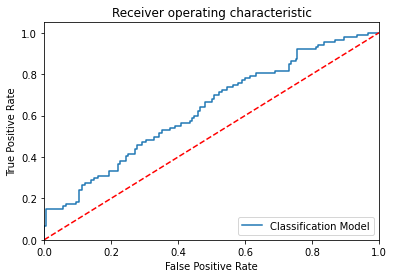

-----------------------------------------------------------------------------------------------------


In [21]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter with RandomizedSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.4393970560760795, fit_intercept=True,
                             intercept_scaling=1, class_weight='None', random_state=None, solver='saga', 
                             max_iter=5000, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [22]:
HTResults.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,0.0,0.0,0.0,LogisticRegression(),276.0,2378.0,541.0,24056.0,0.893,0.338,0.104,0.159,0.978,MCC,0.541000,0.541,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,DecisionTreeClassifier(),1232.0,1422.0,4295.0,20302.0,0.790,0.223,0.464,0.301,0.825,MCC,0.644795,0.644,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,RandomForestClassifier(),548.0,2106.0,947.0,23650.0,0.888,0.367,0.206,0.264,0.961,MCC,0.583990,0.584,NaN,NaN,NaN,NaN
3,3.0,3.0,3.0,ExtraTreesClassifier(),513.0,2141.0,614.0,23983.0,0.899,0.455,0.193,0.271,0.975,MCC,0.584165,0.584,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,KNeighborsClassifier(),695.0,1959.0,1148.0,23449.0,0.886,0.377,0.262,0.309,0.953,MCC,0.607598,0.607,NaN,NaN,NaN,NaN


# Logistic Regression - Hyperparametr tuning with GridSearchCV

In [23]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'penalty': ['none', 'l1', 'l2', 'elasticnet'],
           'C': [100, 10, 1.0, 0.1, 0.01],
           'class_weight': ['None', 'dict', 'balanced'],
           'max_iter': [100, 1000,2500, 5000]
          }

# Create object for model

ModelLR = LogisticRegression(dual=True)

# Prepare the cross-validation procedure

from sklearn.model_selection import RepeatedKFold

RKCV = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelLR, param_grid = GS_grid, cv = RKCV, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 30 folds for each of 1200 candidates, totalling 36000 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(dual=True), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': ['None', 'dict', 'balanced'],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [24]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

Confusion matrix : 
 [[ 26  61]
 [ 30 183]]
Outcome values : 
 26 61 30 183
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.30      0.36        87
           0       0.75      0.86      0.80       213

    accuracy                           0.70       300
   macro avg       0.61      0.58      0.58       300
weighted avg       0.67      0.70      0.67       300

Accuracy : 69.7 %
Precision : 46.4 %
Recall : 29.9 %
F1 Score : 0.364
Specificity or True Negative Rate : 85.9 %
Balanced Accuracy : 57.9 %
MCC : 0.184
roc_auc_score: 0.579


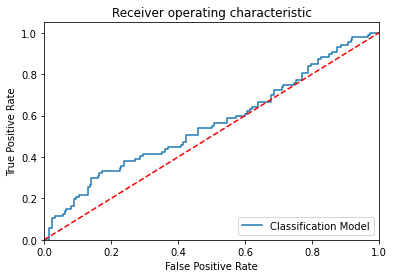

-----------------------------------------------------------------------------------------------------


In [25]:
# To build the 'Logistic Regression' model with random sampling (Hyper parameter tuning with GridSearchCV)

from sklearn.linear_model import LogisticRegression

# Create model object

ModelLR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.01, fit_intercept=True,
                             intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', 
                             max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
                             n_jobs=None, l1_ratio=None)

# Fit the model

ModelLR.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelLR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelLR,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [26]:
HTResults.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False_Negative,False_Positive,True_Negative,True_Positive
0,0.0,0.0,0.0,LogisticRegression(),276.0,2378.0,541.0,24056.0,0.893,0.338,0.104,0.159,0.978,MCC,0.541000,0.541,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,DecisionTreeClassifier(),1232.0,1422.0,4295.0,20302.0,0.790,0.223,0.464,0.301,0.825,MCC,0.644795,0.644,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,RandomForestClassifier(),548.0,2106.0,947.0,23650.0,0.888,0.367,0.206,0.264,0.961,MCC,0.583990,0.584,NaN,NaN,NaN,NaN
3,3.0,3.0,3.0,ExtraTreesClassifier(),513.0,2141.0,614.0,23983.0,0.899,0.455,0.193,0.271,0.975,MCC,0.584165,0.584,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,KNeighborsClassifier(),695.0,1959.0,1148.0,23449.0,0.886,0.377,0.262,0.309,0.953,MCC,0.607598,0.607,NaN,NaN,NaN,NaN
